# A Social Media Analysis Case Study:
## *Scraping and analyzing subreddits*


In [1]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tabulate import tabulate
import nltk
from nltk.corpus import stopwords

In [2]:
#nltk.download('wordnet')
#nltk.download('vader_lexicon')

In [3]:
import praw
from praw.models import MoreComments

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import spacy

In [5]:
reddit = praw.Reddit(client_id='8BReiE7rF5EacSUykjOqgw', client_secret = 'ZhxTaRhDDBy_IAKMt3zeXHc-UZ9ULw', 
                    user_agent = 'Scraping Project')

In [6]:
top10 = reddit.subreddit('WaltDisneyWorld').hot(limit=10)
for post in top10:
    print(post.title)

Monthly Self-Promotion Thread (October 2021)
Weekly FAQ & Reopening Discussion Thread
Just got to our room at the boardwalk and had this waiting for us! Have never seen this before.
Very Long Disney Trip Report 9-26 to 10-1, or, How I Learned To Stop Worrying and Love The Mouse
Anyone Taken the Train to WDW?
Any former cast members here? Just stumbled on a time capsule storage box.
Jellyrolls Is Back!
One little spark of Inspiration
As requested: Full parts list and assembly instructions for my improved microscale WDW Haunted Mansion model. Complete with Doom Buggy, purple wallpaper, and glow-in-the dark ghost effects from the windows and doors. Free to download, happy 50th and happy Halloween! Link in comments.
My New Phone Home Screen


In [82]:
posts = []
DWsub = reddit.subreddit('WaltDisneyWorld')
for post in DWsub.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments,
                 post.selftext, post.created])
posts = pd.DataFrame(posts, columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments',
                                    'body', 'created'])
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Monthly Self-Promotion Thread (October 2021),5,pzm15j,WaltDisneyWorld,https://www.reddit.com/r/WaltDisneyWorld/comme...,18,"Got a blog, YouTube channel, Etsy page, podcas...",1.633140e+09
1,Weekly FAQ & Reopening Discussion Thread,14,q5nqgm,WaltDisneyWorld,https://www.reddit.com/r/WaltDisneyWorld/comme...,162,Please post all your **general** WDW comments ...,1.633925e+09
2,Just got to our room at the boardwalk and had ...,497,q94w5q,WaltDisneyWorld,https://i.redd.it/f7p6iqd1qqt71.jpg,40,,1.634359e+09
3,"Very Long Disney Trip Report 9-26 to 10-1, or,...",17,q9evx2,WaltDisneyWorld,https://www.reddit.com/r/WaltDisneyWorld/comme...,3,"Before we begin, I would like to apologize for...",1.634400e+09
4,Anyone Taken the Train to WDW?,18,q9ccv8,WaltDisneyWorld,https://www.reddit.com/r/WaltDisneyWorld/comme...,9,"I'm taking a trip next year, and considering t...",1.634392e+09
5,Any former cast members here? Just stumbled on...,393,q8wmvg,WaltDisneyWorld,https://i.redd.it/v3hvwq19aot71.jpg,43,,1.634329e+09
6,Jellyrolls Is Back!,175,q90qel,WaltDisneyWorld,https://i.imgur.com/70Qqqjx.jpg,32,,1.634343e+09
7,One little spark of Inspiration,26,q97yjx,WaltDisneyWorld,https://i.redd.it/g9t7qjdzvrt71.jpg,1,,1.634373e+09
8,As requested: Full parts list and assembly ins...,38,q94cr4,WaltDisneyWorld,https://i.redd.it/xt689l3qiqt71.png,4,,1.634357e+09
9,Best Vegetarian Signature Dining,3,q9gr3y,WaltDisneyWorld,https://www.reddit.com/r/WaltDisneyWorld/comme...,7,Which signature dining experience at WDW do yo...,1.634406e+09


In [8]:
FAQpost = reddit.submission(id='q0xvy1')

In [9]:
FAQcomments = []
FAQpost.comments.replace_more(limit=None)
for comments in FAQpost.comments.list():
    FAQcomments.append(comments.body)
print(FAQcomments, '\n')
print('Total Comments Scrapped = ', (len(FAQcomments)))

['Anyone know how Trader Sam’s wait times have been lately?', "Ok, we are a week away from the big family trip! I have a few questions. \n\n1. How hard is it to get a boarding group for Remy? I'm really hoping it isn't like Rise, that made me so dang nervous I thought I needed BP meds afterwards. \n\n2. How do I ship something to the resort from Amazon? Last time we stayed we brought a mattress pad for the pull out couch, but this time I need the luggage space. So I want to ship it ahead. \n\n3. Groceries, we plan on ordering from garden grocer. How far in advance should we order? \n\nThanks! We are excited. It's my kids' first trip ever. We are DVC members, so this won't be their last. However, we want it to be as best as possible. This is my second trip this year though. So I'm just ready to be done packing and be there already!!", 'Anybody have any idea when random reservations might typically become available? We are 59 days out from our trip and weren’t able to get reservations fo

In [83]:
posts = []
DWsub = reddit.subreddit('disney')
for post in DWsub.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments,
                 post.selftext, post.created])
posts = pd.DataFrame(posts, columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments',
                                    'body', 'created'])
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Disney's Encanto | Teaser Trailer,1054,og6y7b,disney,https://www.youtube.com/watch?v=togmdDHG3Pw,190,,1.625750e+09
1,"Another warm up sketch. This time, Ariel. Than...",591,q7zl9d,disney,https://i.redd.it/6el5y5em2ft71.jpg,21,,1.634218e+09
2,Disney Movies : summarised by Olaf,258,q81lyn,disney,https://youtu.be/2Stzk2aopxs,22,,1.634224e+09
3,Oogie looming over California Adventure,1199,q7dod8,disney,https://i.redd.it/iv93cl70l8t71.jpg,16,,1.634139e+09
4,It's a work in progress but I'm trying to pain...,198,q7ldjs,disney,https://i.redd.it/6vwf1tw5fat71.jpg,6,,1.634161e+09
5,Had a great time at the Oogie Boogie Bash last...,309,q7cyr0,disney,https://i.redd.it/q3ce9k2se8t71.jpg,5,,1.634137e+09
6,Thanks Disney! Really enjoyed The Scariest Sto...,30,q7p328,disney,https://i.redd.it/ysqk2brwfbt71.jpg,2,,1.634174e+09
7,My fanart of Remy from Ratatouille! What it he...,57,q7hvx8,disney,https://i.redd.it/zjvy745ck9t71.jpg,3,,1.634151e+09
8,Found these cups at my grandma's house. She ha...,15,q7ku10,disney,https://www.reddit.com/gallery/q7ku10,5,,1.634160e+09
9,My kitten and my 2 year old enjoying Luca,6,q7p5sx,disney,https://www.reddit.com/gallery/q7p5sx,0,,1.634174e+09


In [11]:
Encanto = reddit.submission(id='og6y7b')

In [12]:
Encantocomments = []
Encanto.comments.replace_more(limit=None)
for comments in Encanto.comments.list():
    Encantocomments.append(comments.body)
print(Encantocomments, '\n')
print('Total Comments Scrapped = ', (len(Encantocomments)))

['Calling it now: Alan Tudyk will be the tapir.', 'The animation looks great and the setting seems really cool, but I can’t explain *how excited I am* for a new Disney movie with Lin Manuel Miranda writing the original songs! Moana had some of my all-time favorite Disney songs, to the point where it’s comfortably in my top 10 (maybe even 5?) Disney movies. Which is weird to say as someone in their 30’s who didn’t grow up with the movie, but that’s how good it was!', 'Mirabel looks older than her age with those hairstyle and glasses but I do like the desing otherwise. I am glad they did something unique with her and not something that would sell most toys. And I have see people demanding glasses fr Disney Princess even when first Frozen came out so I hope those people are pleased.', "Holy crap the animation is gorgeous. And I love the rainforest critters! Very excited for this. Also I'd love if we got a full on evil villain song", "This animation is freaking jaw-dropping. I'm looking fo

In [16]:
Genie = reddit.submission(id='q45lz3')

In [17]:
Geniecomments = []
Genie.comments.replace_more(limit=None)
for comments in Genie.comments.list():
    Geniecomments.append(comments.body)
print(Geniecomments, '\n')
print('Total Comments Scrapped = ', (len(Geniecomments)))

['Hi, folks! We’re going to treat this as a Genie+ megathread of sorts for the rest of the day. So, if you submit another Genie+ related post and it gets removed, please resubmit your questions/comments in this thread (for now).\n\nIf there’s still a ton of buzz/questions about this tomorrow, we may do a stickied megathread over the weekend, like we did for the 50th. Thanks and stay safe out there!', ">Prices will vary by date, attraction and park. For example, the Lightning Lane entrance to Remy's Ratatouille Adventure will be $9 per person on October 19 and $11 per person on October 23. As another example, on both those dates, Lightning Lane entrance to Expedition Everest – Legend of the Forbidden Mountain will be $7 per person, while Star Wars: Rise of the Resistance will be $15 per person. Throughout the year, prices may be lower on some days and higher on other days. This option may be purchased at up to 2 different attractions each day.\n\nSince this was behind a couple extra lin

In [18]:
#convert to a string
disneyFAQ = FAQcomments
disneyFAQ = [str(i) for i in disneyFAQ]
FAQ_unclean = ','.join(disneyFAQ)
FAQ_unclean

'Anyone know how Trader Sam’s wait times have been lately?,Ok, we are a week away from the big family trip! I have a few questions. \n\n1. How hard is it to get a boarding group for Remy? I\'m really hoping it isn\'t like Rise, that made me so dang nervous I thought I needed BP meds afterwards. \n\n2. How do I ship something to the resort from Amazon? Last time we stayed we brought a mattress pad for the pull out couch, but this time I need the luggage space. So I want to ship it ahead. \n\n3. Groceries, we plan on ordering from garden grocer. How far in advance should we order? \n\nThanks! We are excited. It\'s my kids\' first trip ever. We are DVC members, so this won\'t be their last. However, we want it to be as best as possible. This is my second trip this year though. So I\'m just ready to be done packing and be there already!!,Anybody have any idea when random reservations might typically become available? We are 59 days out from our trip and weren’t able to get reservations for

In [19]:
#remove emojis
FAQ_emo = emoji.get_emoji_regexp().sub(u'', FAQ_unclean)

In [20]:
#tokenize the words
FAQ_token = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
FAQ_token_string = FAQ_token.tokenize(FAQ_emo)
print(FAQ_token_string)

['Anyone', 'know', 'how', 'Trader', 'Sam', 's', 'wait', 'times', 'have', 'been', 'lately', 'Ok', 'we', 'are', 'a', 'week', 'away', 'from', 'the', 'big', 'family', 'trip', 'I', 'have', 'a', 'few', 'questions', '1', 'How', 'hard', 'is', 'it', 'to', 'get', 'a', 'boarding', 'group', 'for', 'Remy', 'I', 'm', 'really', 'hoping', 'it', 'isn', 't', 'like', 'Rise', 'that', 'made', 'me', 'so', 'dang', 'nervous', 'I', 'thought', 'I', 'needed', 'BP', 'meds', 'afterwards', '2', 'How', 'do', 'I', 'ship', 'something', 'to', 'the', 'resort', 'from', 'Amazon', 'Last', 'time', 'we', 'stayed', 'we', 'brought', 'a', 'mattress', 'pad', 'for', 'the', 'pull', 'out', 'couch', 'but', 'this', 'time', 'I', 'need', 'the', 'luggage', 'space', 'So', 'I', 'want', 'to', 'ship', 'it', 'ahead', '3', 'Groceries', 'we', 'plan', 'on', 'ordering', 'from', 'garden', 'grocer', 'How', 'far', 'in', 'advance', 'should', 'we', 'order', 'Thanks', 'We', 'are', 'excited', 'It', 's', 'my', 'kids', 'first', 'trip', 'ever', 'We', 'are

In [21]:
#lowercase the words
FAQ_token_lower = [word.lower() for word in FAQ_token_string]
print(FAQ_token_lower)

['anyone', 'know', 'how', 'trader', 'sam', 's', 'wait', 'times', 'have', 'been', 'lately', 'ok', 'we', 'are', 'a', 'week', 'away', 'from', 'the', 'big', 'family', 'trip', 'i', 'have', 'a', 'few', 'questions', '1', 'how', 'hard', 'is', 'it', 'to', 'get', 'a', 'boarding', 'group', 'for', 'remy', 'i', 'm', 'really', 'hoping', 'it', 'isn', 't', 'like', 'rise', 'that', 'made', 'me', 'so', 'dang', 'nervous', 'i', 'thought', 'i', 'needed', 'bp', 'meds', 'afterwards', '2', 'how', 'do', 'i', 'ship', 'something', 'to', 'the', 'resort', 'from', 'amazon', 'last', 'time', 'we', 'stayed', 'we', 'brought', 'a', 'mattress', 'pad', 'for', 'the', 'pull', 'out', 'couch', 'but', 'this', 'time', 'i', 'need', 'the', 'luggage', 'space', 'so', 'i', 'want', 'to', 'ship', 'it', 'ahead', '3', 'groceries', 'we', 'plan', 'on', 'ordering', 'from', 'garden', 'grocer', 'how', 'far', 'in', 'advance', 'should', 'we', 'order', 'thanks', 'we', 'are', 'excited', 'it', 's', 'my', 'kids', 'first', 'trip', 'ever', 'we', 'are

In [22]:
#remove stopwords
stop_words = set(stopwords.words('english'))
FAQ_text = FAQ_token_lower
FAQ_nosw = [w for w in FAQ_text if not w.lower() in stop_words]
print(FAQ_nosw)

['anyone', 'know', 'trader', 'sam', 'wait', 'times', 'lately', 'ok', 'week', 'away', 'big', 'family', 'trip', 'questions', '1', 'hard', 'get', 'boarding', 'group', 'remy', 'really', 'hoping', 'like', 'rise', 'made', 'dang', 'nervous', 'thought', 'needed', 'bp', 'meds', 'afterwards', '2', 'ship', 'something', 'resort', 'amazon', 'last', 'time', 'stayed', 'brought', 'mattress', 'pad', 'pull', 'couch', 'time', 'need', 'luggage', 'space', 'want', 'ship', 'ahead', '3', 'groceries', 'plan', 'ordering', 'garden', 'grocer', 'far', 'advance', 'order', 'thanks', 'excited', 'kids', 'first', 'trip', 'ever', 'dvc', 'members', 'last', 'however', 'want', 'best', 'possible', 'second', 'trip', 'year', 'though', 'ready', 'done', 'packing', 'already', 'anybody', 'idea', 'random', 'reservations', 'might', 'typically', 'become', 'available', '59', 'days', 'trip', 'able', 'get', 'reservations', 'space', '220', 'despite', 'checking', 'soon', 'possibly', 'could', 'signed', 'mouse', 'watcher', 'hoping', 'get',

In [23]:
#Normalizing words
FAQ_lemmatizer = WordNetLemmatizer()

FAQ_lemmatized = ([FAQ_lemmatizer.lemmatize(w) for w in FAQ_nosw])
print(FAQ_lemmatized)

['anyone', 'know', 'trader', 'sam', 'wait', 'time', 'lately', 'ok', 'week', 'away', 'big', 'family', 'trip', 'question', '1', 'hard', 'get', 'boarding', 'group', 'remy', 'really', 'hoping', 'like', 'rise', 'made', 'dang', 'nervous', 'thought', 'needed', 'bp', 'med', 'afterwards', '2', 'ship', 'something', 'resort', 'amazon', 'last', 'time', 'stayed', 'brought', 'mattress', 'pad', 'pull', 'couch', 'time', 'need', 'luggage', 'space', 'want', 'ship', 'ahead', '3', 'grocery', 'plan', 'ordering', 'garden', 'grocer', 'far', 'advance', 'order', 'thanks', 'excited', 'kid', 'first', 'trip', 'ever', 'dvc', 'member', 'last', 'however', 'want', 'best', 'possible', 'second', 'trip', 'year', 'though', 'ready', 'done', 'packing', 'already', 'anybody', 'idea', 'random', 'reservation', 'might', 'typically', 'become', 'available', '59', 'day', 'trip', 'able', 'get', 'reservation', 'space', '220', 'despite', 'checking', 'soon', 'possibly', 'could', 'signed', 'mouse', 'watcher', 'hoping', 'get', 'lucky', 

In [24]:
#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
FAQ_results = []

for sentences in FAQ_lemmatized:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    FAQ_results.append(pol_score)
    
FAQ_df = pd.DataFrame.from_records(FAQ_results)
FAQ_df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0,anyone
1,0.0,1.0,0.0,0.0,know
2,0.0,1.0,0.0,0.0,trader
3,0.0,1.0,0.0,0.0,sam
4,0.0,1.0,0.0,0.0,wait
...,...,...,...,...,...
3949,0.0,1.0,0.0,0.0,infection
3950,0.0,1.0,0.0,0.0,blood
3951,0.0,1.0,0.0,0.0,would
3952,0.0,1.0,0.0,0.0,thick


In [25]:
FAQ_df['label'] = 0
FAQ_df.loc[FAQ_df['compound'] > 0.10, 'label'] = 1
FAQ_df.loc[FAQ_df['compound'] < -0.10, 'label'] = -1
FAQ_df.head()

,neg,neu,pos,compound,words,label
0,0.0,1.0,0.0,0.0,anyone,0
1,0.0,1.0,0.0,0.0,know,0
2,0.0,1.0,0.0,0.0,trader,0
3,0.0,1.0,0.0,0.0,sam,0
4,0.0,1.0,0.0,0.0,wait,0


In [26]:
print(FAQ_df.label.value_counts())

 0    3555
 1     308
-1      91
Name: label, dtype: int64


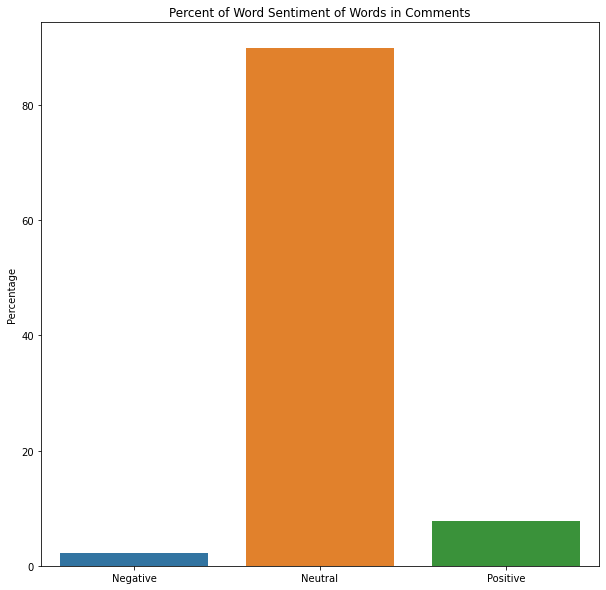

In [87]:
fig, ax = plt.subplots(figsize = (10,10))

counts = FAQ_df.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')
plt.title('Percent of Word Sentiment of Words in Comments')
plt.show()

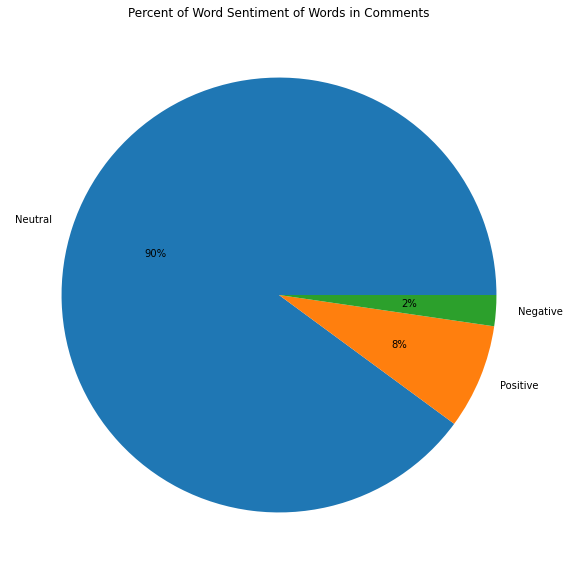

In [86]:
fig, ax = plt.subplots(figsize = (10,10))

counts = FAQ_df.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Neutral', 'Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent of Word Sentiment of Words in Comments')
plt.show()

In [28]:
FAQ_pos_neg = FAQ_df.loc[FAQ_df['label'] != 0]

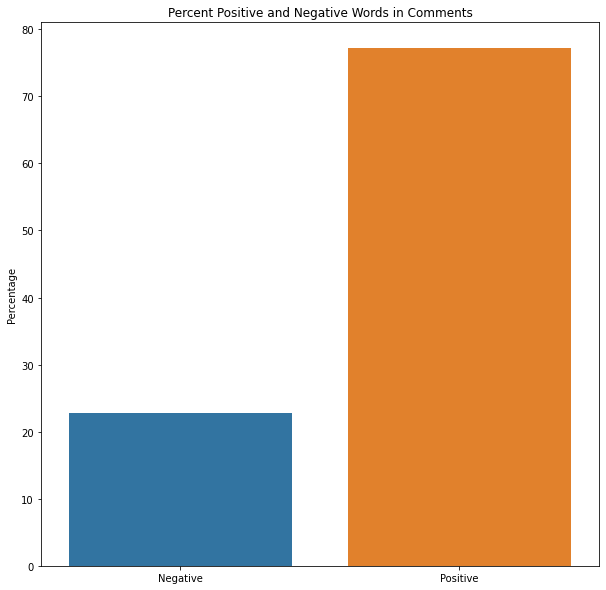

In [88]:
fig, ax = plt.subplots(figsize = (10,10))

counts = FAQ_pos_neg.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('Percentage')
plt.title('Percent Positive and Negative Words in Comments')
plt.show()

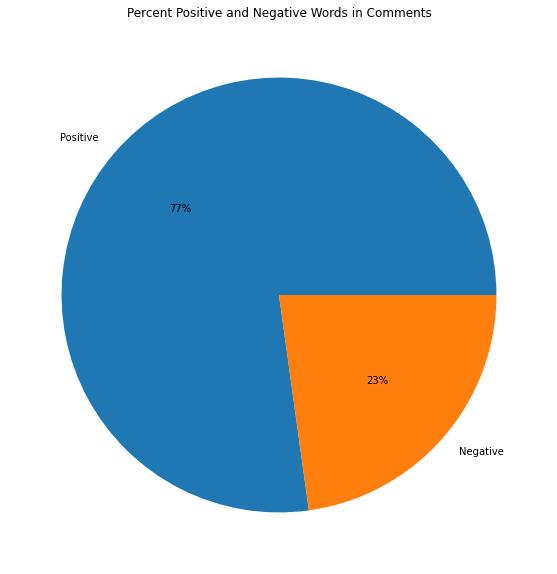

In [91]:
fig, ax = plt.subplots(figsize = (10,10))

counts = FAQ_pos_neg.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent Positive and Negative Words in Comments')
plt.show()

In [31]:
FAQ_positive = list(FAQ_df.loc[FAQ_df['label'] == 1].words)
print(FAQ_positive)

['ok', 'hoping', 'like', 'amazon', 'thanks', 'excited', 'best', 'ready', 'hoping', 'lucky', 'hoping', 'well', 'pretty', 'popular', 'holiday', 'like', 'treat', 'curious', 'like', 'holiday', 'treat', 'party', 'clear', 'hopefully', 'safe', 'friend', 'amazing', 'wonderful', 'like', 'amazing', 'breathtaking', 'thank', 'hero', 'lol', 'lol', 'amazing', 'lol', 'thank', 'favorite', 'lol', 'huge', 'fan', 'lol', 'loved', 'hoping', 'interest', 'luck', 'thanks', 'love', 'neat', 'love', 'adventure', 'certain', 'better', 'thanks', 'friend', 'reassure', 'thanks', 'like', 'luck', 'best', 'like', 'excited', 'greets', 'hoping', 'greater', 'active', 'please', 'thank', 'like', 'like', 'luck', 'festival', 'great', 'good', 'festival', 'friend', 'best', 'top', 'certain', 'fortunate', 'hopefully', 'giving', 'chance', 'party', 'kind', 'like', 'well', 'good', 'thanks', 'tia', 'like', 'help', 'advanced', 'wish', 'attraction', 'like', 'friend', 'hopefully', 'like', 'party', 'friend', 'straight', 'like', 'fair', 'l

In [32]:
FAQ_positive_frequency = FreqDist(FAQ_positive)
FAQ_positive_frequency

FreqDist({'like': 29, 'thank': 15, 'thanks': 12, 'good': 11, 'well': 10, 'lol': 9, 'sure': 9, 'hoping': 7, 'pretty': 7, 'yeah': 7, ...})

In [33]:
FAQ_neg = list(FAQ_df.loc[FAQ_df['label'] == -1].words)
FAQ_neg_frequency = FreqDist(FAQ_neg)
FAQ_neg_frequency

FreqDist({'hard': 6, 'limited': 5, 'drop': 4, 'worried': 3, 'problem': 3, 'demand': 3, 'low': 3, 'avoid': 3, 'cancel': 2, 'risk': 2, ...})

In [34]:
pos_words = [str(p) for p in FAQ_positive_frequency]
pos_words_string = ','.join(pos_words)
neg_words = [str(n) for n in FAQ_neg_frequency]
neg_words_string = ','.join(neg_words)

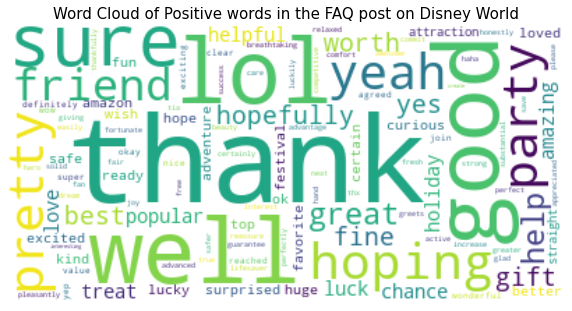

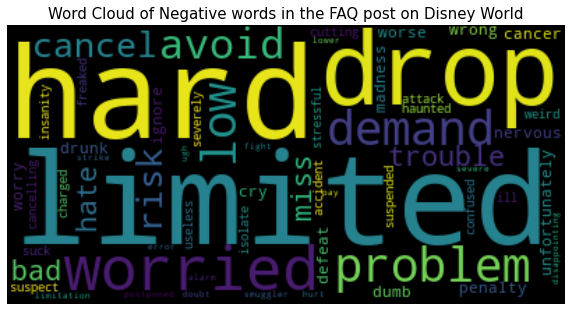

In [79]:
from wordcloud import WordCloud
wordcloud_pos = WordCloud(background_color='white').generate(pos_words_string)
wordcloud_neg = WordCloud().generate(neg_words_string)
plt.rcParams['figure.figsize'] = (10,10) 
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud of Positive words in the FAQ post on Disney World', fontsize = 15 )
plt.axis('off')
plt.show()

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative words in the FAQ post on Disney World', fontsize = 15 )
plt.axis('off')
plt.show()


In [36]:
#convert to a string
Encanto_sent = Encantocomments
Encanto_sent = [str(i) for i in Encanto_sent]
Encanto_unclean = ','.join(Encanto_sent)
Encanto_unclean

'Calling it now: Alan Tudyk will be the tapir.,The animation looks great and the setting seems really cool, but I can’t explain *how excited I am* for a new Disney movie with Lin Manuel Miranda writing the original songs! Moana had some of my all-time favorite Disney songs, to the point where it’s comfortably in my top 10 (maybe even 5?) Disney movies. Which is weird to say as someone in their 30’s who didn’t grow up with the movie, but that’s how good it was!,Mirabel looks older than her age with those hairstyle and glasses but I do like the desing otherwise. I am glad they did something unique with her and not something that would sell most toys. And I have see people demanding glasses fr Disney Princess even when first Frozen came out so I hope those people are pleased.,Holy crap the animation is gorgeous. And I love the rainforest critters! Very excited for this. Also I\'d love if we got a full on evil villain song,This animation is freaking jaw-dropping. I\'m looking forward to it

In [37]:
#remove emojis
Enc_emo = emoji.get_emoji_regexp().sub(u'', Encanto_unclean)

In [38]:
#tokenize the words
E_token = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
E_token_string = E_token.tokenize(Enc_emo)
print(E_token_string)

['Calling', 'it', 'now', 'Alan', 'Tudyk', 'will', 'be', 'the', 'tapir', 'The', 'animation', 'looks', 'great', 'and', 'the', 'setting', 'seems', 'really', 'cool', 'but', 'I', 'can', 't', 'explain', 'how', 'excited', 'I', 'am', 'for', 'a', 'new', 'Disney', 'movie', 'with', 'Lin', 'Manuel', 'Miranda', 'writing', 'the', 'original', 'songs', 'Moana', 'had', 'some', 'of', 'my', 'all', 'time', 'favorite', 'Disney', 'songs', 'to', 'the', 'point', 'where', 'it', 's', 'comfortably', 'in', 'my', 'top', '10', 'maybe', 'even', '5', 'Disney', 'movies', 'Which', 'is', 'weird', 'to', 'say', 'as', 'someone', 'in', 'their', '30', 's', 'who', 'didn', 't', 'grow', 'up', 'with', 'the', 'movie', 'but', 'that', 's', 'how', 'good', 'it', 'was', 'Mirabel', 'looks', 'older', 'than', 'her', 'age', 'with', 'those', 'hairstyle', 'and', 'glasses', 'but', 'I', 'do', 'like', 'the', 'desing', 'otherwise', 'I', 'am', 'glad', 'they', 'did', 'something', 'unique', 'with', 'her', 'and', 'not', 'something', 'that', 'would'

In [39]:
#lowercase the words
E_token_lower = [word.lower() for word in E_token_string]
print(E_token_lower)

['calling', 'it', 'now', 'alan', 'tudyk', 'will', 'be', 'the', 'tapir', 'the', 'animation', 'looks', 'great', 'and', 'the', 'setting', 'seems', 'really', 'cool', 'but', 'i', 'can', 't', 'explain', 'how', 'excited', 'i', 'am', 'for', 'a', 'new', 'disney', 'movie', 'with', 'lin', 'manuel', 'miranda', 'writing', 'the', 'original', 'songs', 'moana', 'had', 'some', 'of', 'my', 'all', 'time', 'favorite', 'disney', 'songs', 'to', 'the', 'point', 'where', 'it', 's', 'comfortably', 'in', 'my', 'top', '10', 'maybe', 'even', '5', 'disney', 'movies', 'which', 'is', 'weird', 'to', 'say', 'as', 'someone', 'in', 'their', '30', 's', 'who', 'didn', 't', 'grow', 'up', 'with', 'the', 'movie', 'but', 'that', 's', 'how', 'good', 'it', 'was', 'mirabel', 'looks', 'older', 'than', 'her', 'age', 'with', 'those', 'hairstyle', 'and', 'glasses', 'but', 'i', 'do', 'like', 'the', 'desing', 'otherwise', 'i', 'am', 'glad', 'they', 'did', 'something', 'unique', 'with', 'her', 'and', 'not', 'something', 'that', 'would'

In [40]:
#remove stopwords
stop_words = set(stopwords.words('english'))
E_text = E_token_lower
E_nosw = [w for w in E_text if not w.lower() in stop_words]
print(E_nosw)

['calling', 'alan', 'tudyk', 'tapir', 'animation', 'looks', 'great', 'setting', 'seems', 'really', 'cool', 'explain', 'excited', 'new', 'disney', 'movie', 'lin', 'manuel', 'miranda', 'writing', 'original', 'songs', 'moana', 'time', 'favorite', 'disney', 'songs', 'point', 'comfortably', 'top', '10', 'maybe', 'even', '5', 'disney', 'movies', 'weird', 'say', 'someone', '30', 'grow', 'movie', 'good', 'mirabel', 'looks', 'older', 'age', 'hairstyle', 'glasses', 'like', 'desing', 'otherwise', 'glad', 'something', 'unique', 'something', 'would', 'sell', 'toys', 'see', 'people', 'demanding', 'glasses', 'fr', 'disney', 'princess', 'even', 'first', 'frozen', 'came', 'hope', 'people', 'pleased', 'holy', 'crap', 'animation', 'gorgeous', 'love', 'rainforest', 'critters', 'excited', 'also', 'love', 'got', 'full', 'evil', 'villain', 'song', 'animation', 'freaking', 'jaw', 'dropping', 'looking', 'forward', 'alone', 'looks', 'incredible', 'someone', 'whose', 'family', 'came', 'venezuela', 'cool', 'see',

In [41]:
#Normalizing words
E_lemmatizer = WordNetLemmatizer()

E_lemmatized = ([E_lemmatizer.lemmatize(w) for w in E_nosw])
print(E_lemmatized)

['calling', 'alan', 'tudyk', 'tapir', 'animation', 'look', 'great', 'setting', 'seems', 'really', 'cool', 'explain', 'excited', 'new', 'disney', 'movie', 'lin', 'manuel', 'miranda', 'writing', 'original', 'song', 'moana', 'time', 'favorite', 'disney', 'song', 'point', 'comfortably', 'top', '10', 'maybe', 'even', '5', 'disney', 'movie', 'weird', 'say', 'someone', '30', 'grow', 'movie', 'good', 'mirabel', 'look', 'older', 'age', 'hairstyle', 'glass', 'like', 'desing', 'otherwise', 'glad', 'something', 'unique', 'something', 'would', 'sell', 'toy', 'see', 'people', 'demanding', 'glass', 'fr', 'disney', 'princess', 'even', 'first', 'frozen', 'came', 'hope', 'people', 'pleased', 'holy', 'crap', 'animation', 'gorgeous', 'love', 'rainforest', 'critter', 'excited', 'also', 'love', 'got', 'full', 'evil', 'villain', 'song', 'animation', 'freaking', 'jaw', 'dropping', 'looking', 'forward', 'alone', 'look', 'incredible', 'someone', 'whose', 'family', 'came', 'venezuela', 'cool', 'see', 'south', 'a

In [42]:
#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
E_results = []

for sentences in E_lemmatized:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    E_results.append(pol_score)
    
E_df = pd.DataFrame.from_records(E_results)
E_df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,calling
1,0.0,1.0,0.0,0.0000,alan
2,0.0,1.0,0.0,0.0000,tudyk
3,0.0,1.0,0.0,0.0000,tapir
4,0.0,1.0,0.0,0.0000,animation
...,...,...,...,...,...
2877,0.0,0.0,0.0,0.0000,u
2878,0.0,1.0,0.0,0.0000,ur
2879,0.0,1.0,0.0,0.0000,one
2880,0.0,1.0,0.0,0.0000,got


In [43]:
E_df['label'] = 0
E_df.loc[E_df['compound'] > 0.10, 'label'] = 1
E_df.loc[E_df['compound'] < -0.10, 'label'] = -1
E_df.head()

print(E_df.label.value_counts())

 0    2482
 1     304
-1      96
Name: label, dtype: int64


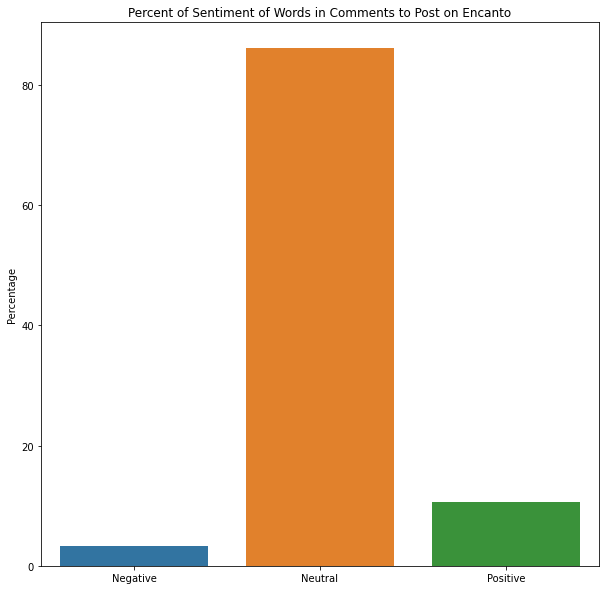

In [78]:
fig, ax = plt.subplots(figsize = (10,10))

counts = E_df.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')
plt.title('Percent of Sentiment of Words in Comments to Post on Encanto')
plt.show()

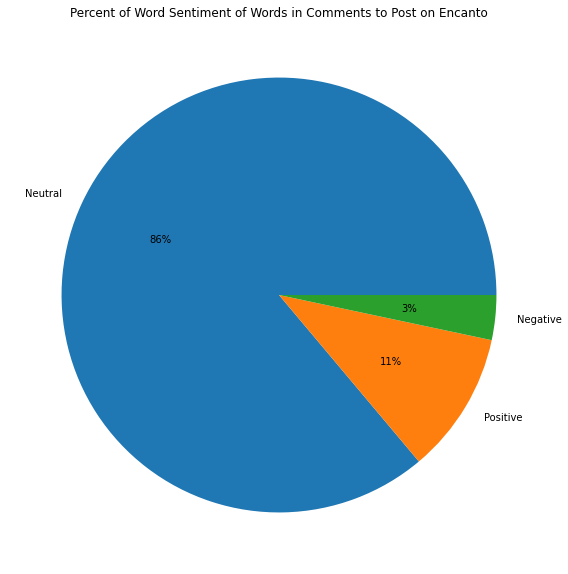

In [92]:
fig, ax = plt.subplots(figsize = (10,10))

counts = E_df.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Neutral', 'Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent of Word Sentiment of Words in Comments to Post on Encanto')
plt.show()

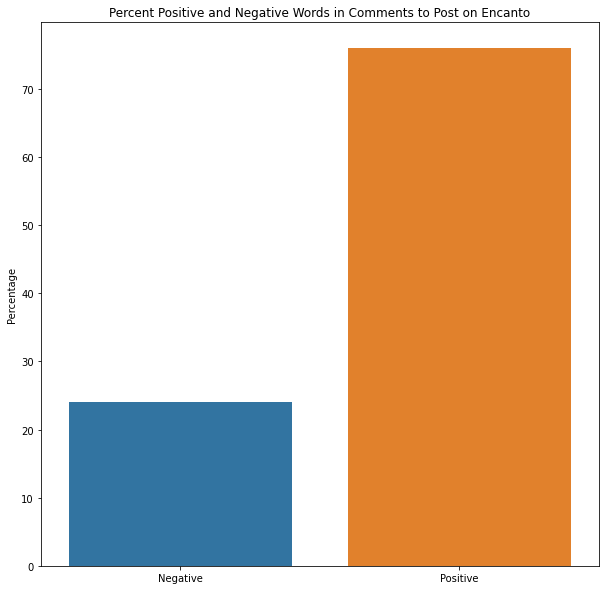

In [77]:
E_pos_neg = E_df.loc[E_df['label'] != 0]

fig, ax = plt.subplots(figsize = (10,10))

counts = E_pos_neg.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('Percentage')
plt.title('Percent Positive and Negative Words in Comments to Post on Encanto')
plt.show()

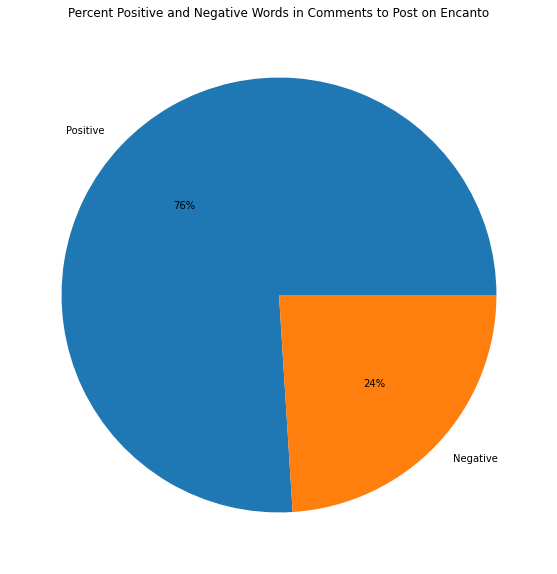

In [46]:
fig, ax = plt.subplots(figsize = (10,10))

counts = E_pos_neg.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent Positive and Negative Words in Comments to Post on Encanto')
plt.show()

In [47]:
E_positive = list(E_df.loc[E_df['label'] == 1].words)
print(E_positive)


['great', 'cool', 'excited', 'original', 'favorite', 'comfortably', 'top', 'good', 'like', 'glad', 'hope', 'pleased', 'gorgeous', 'love', 'excited', 'love', 'cool', 'love', 'god', 'well', 'excited', 'excited', 'recommend', 'great', 'like', 'good', 'gift', 'love', 'fantastic', 'super', 'strength', 'like', 'good', 'honestly', 'excited', 'gorgeous', 'amazing', 'loving', 'definitely', 'appreciate', 'certain', 'nice', 'great', 'like', 'lmfao', 'like', 'wp', 'wp', 'charming', 'hope', 'entertaining', 'like', 'wise', 'hope', 'invite', 'perfect', 'like', 'like', 'like', 'hope', 'good', 'super', 'like', 'hero', 'excited', 'love', 'pretty', 'adore', 'beautiful', 'hope', 'nice', 'important', 'well', 'like', 'hero', 'pretty', 'gorgeous', 'loving', 'well', 'love', 'like', 'fun', 'yes', 'please', 'like', 'great', 'awesome', 'yeah', 'yay', 'proud', 'excited', 'nice', 'excited', 'super', 'super', 'glad', 'inspired', 'super', 'amazing', 'excited', 'fantastic', 'fantastic', 'glad', 'super', 'great', 'her

In [48]:
E_positive_frequency = FreqDist(E_positive)
E_positive_frequency


FreqDist({'like': 35, 'great': 12, 'well': 12, 'excited': 10, 'good': 10, 'love': 10, 'hero': 10, 'hope': 7, 'super': 6, 'nice': 6, ...})

In [49]:
E_neg = list(E_df.loc[E_df['label'] == -1].words)
E_neg_frequency = FreqDist(E_neg)
E_neg_frequency

FreqDist({'villain': 4, 'wreck': 4, 'complaining': 3, 'problem': 3, 'hate': 3, 'miss': 2, 'cry': 2, 'angry': 2, 'scream': 2, 'cowardly': 2, ...})

In [50]:
E_pos_words = [str(p) for p in E_positive_frequency]
E_pos_words_string = ','.join(E_pos_words)
E_neg_words = [str(n) for n in E_neg_frequency]
E_neg_words_string = ','.join(E_neg_words)

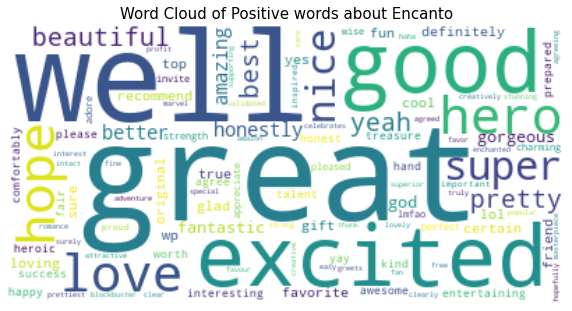

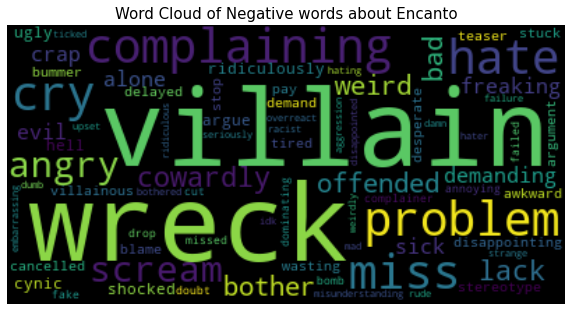

In [76]:
from wordcloud import WordCloud
E_wordcloud_pos = WordCloud(background_color='white').generate(E_pos_words_string)
E_wordcloud_neg = WordCloud().generate(E_neg_words_string)
plt.rcParams['figure.figsize'] = (10,10) 
plt.imshow(E_wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud of Positive words about Encanto', fontsize = 15 )
plt.axis('off')
plt.show()

plt.imshow(E_wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative words about Encanto', fontsize = 15 )
plt.axis('off')
plt.show()

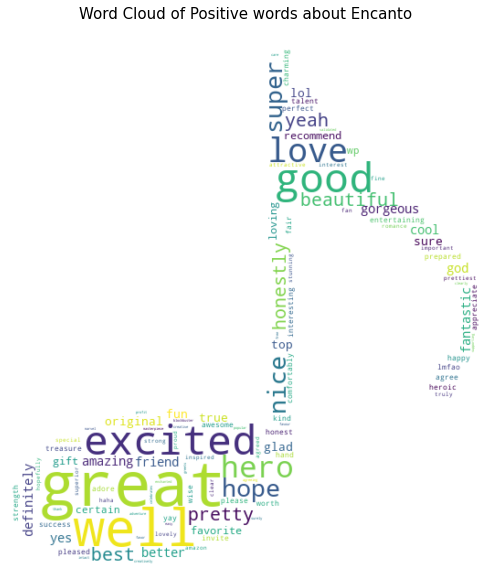

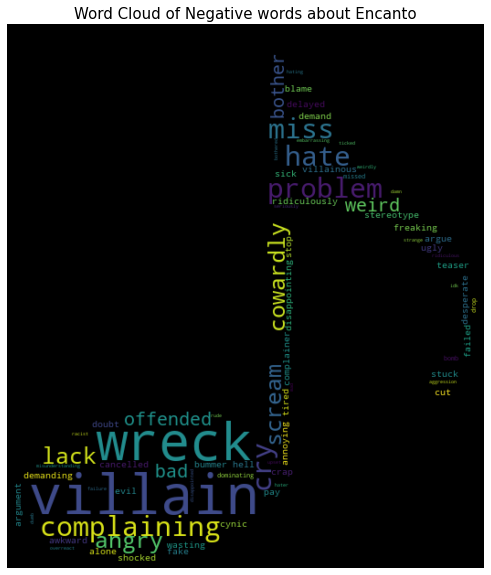

In [75]:
from wordcloud import WordCloud
from PIL import Image
mask = np.array(Image.open("music.png"))
E_wordcloud_pos = WordCloud(background_color='white', mask=mask).generate(E_pos_words_string)
E_wordcloud_neg = WordCloud(mask=mask).generate(E_neg_words_string)
plt.rcParams['figure.figsize'] = (10,10) 
plt.imshow(E_wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive words about Encanto', fontsize = 15 )
plt.show()

plt.imshow(E_wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative words about Encanto', fontsize = 15 )
plt.axis('off')
plt.show()

In [53]:
#convert to a string
Genie_sent = Geniecomments
Genie_sent = [str(i) for i in Genie_sent]
Genie_unclean = ','.join(Genie_sent)
Genie_unclean

'Hi, folks! We’re going to treat this as a Genie+ megathread of sorts for the rest of the day. So, if you submit another Genie+ related post and it gets removed, please resubmit your questions/comments in this thread (for now).\n\nIf there’s still a ton of buzz/questions about this tomorrow, we may do a stickied megathread over the weekend, like we did for the 50th. Thanks and stay safe out there!,>Prices will vary by date, attraction and park. For example, the Lightning Lane entrance to Remy\'s Ratatouille Adventure will be $9 per person on October 19 and $11 per person on October 23. As another example, on both those dates, Lightning Lane entrance to Expedition Everest – Legend of the Forbidden Mountain will be $7 per person, while Star Wars: Rise of the Resistance will be $15 per person. Throughout the year, prices may be lower on some days and higher on other days. This option may be purchased at up to 2 different attractions each day.\n\nSince this was behind a couple extra links 

In [54]:
#remove emojis
Gen_emo = emoji.get_emoji_regexp().sub(u'', Genie_unclean)

In [55]:
#tokenize the words
G_token = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
G_token_string = G_token.tokenize(Gen_emo)
print(G_token_string)

['Hi', 'folks', 'We', 're', 'going', 'to', 'treat', 'this', 'as', 'a', 'Genie', 'megathread', 'of', 'sorts', 'for', 'the', 'rest', 'of', 'the', 'day', 'So', 'if', 'you', 'submit', 'another', 'Genie', 'related', 'post', 'and', 'it', 'gets', 'removed', 'please', 'resubmit', 'your', 'questions', 'comments', 'in', 'this', 'thread', 'for', 'now', 'If', 'there', 's', 'still', 'a', 'ton', 'of', 'buzz', 'questions', 'about', 'this', 'tomorrow', 'we', 'may', 'do', 'a', 'stickied', 'megathread', 'over', 'the', 'weekend', 'like', 'we', 'did', 'for', 'the', '50th', 'Thanks', 'and', 'stay', 'safe', 'out', 'there', 'Prices', 'will', 'vary', 'by', 'date', 'attraction', 'and', 'park', 'For', 'example', 'the', 'Lightning', 'Lane', 'entrance', 'to', 'Remy', 's', 'Ratatouille', 'Adventure', 'will', 'be', '$9', 'per', 'person', 'on', 'October', '19', 'and', '$11', 'per', 'person', 'on', 'October', '23', 'As', 'another', 'example', 'on', 'both', 'those', 'dates', 'Lightning', 'Lane', 'entrance', 'to', 'Exp

In [56]:
#lowercase the words
G_token_lower = [word.lower() for word in G_token_string]
print(G_token_lower)

['hi', 'folks', 'we', 're', 'going', 'to', 'treat', 'this', 'as', 'a', 'genie', 'megathread', 'of', 'sorts', 'for', 'the', 'rest', 'of', 'the', 'day', 'so', 'if', 'you', 'submit', 'another', 'genie', 'related', 'post', 'and', 'it', 'gets', 'removed', 'please', 'resubmit', 'your', 'questions', 'comments', 'in', 'this', 'thread', 'for', 'now', 'if', 'there', 's', 'still', 'a', 'ton', 'of', 'buzz', 'questions', 'about', 'this', 'tomorrow', 'we', 'may', 'do', 'a', 'stickied', 'megathread', 'over', 'the', 'weekend', 'like', 'we', 'did', 'for', 'the', '50th', 'thanks', 'and', 'stay', 'safe', 'out', 'there', 'prices', 'will', 'vary', 'by', 'date', 'attraction', 'and', 'park', 'for', 'example', 'the', 'lightning', 'lane', 'entrance', 'to', 'remy', 's', 'ratatouille', 'adventure', 'will', 'be', '$9', 'per', 'person', 'on', 'october', '19', 'and', '$11', 'per', 'person', 'on', 'october', '23', 'as', 'another', 'example', 'on', 'both', 'those', 'dates', 'lightning', 'lane', 'entrance', 'to', 'exp

In [57]:
#remove stopwords
stop_words = set(stopwords.words('english'))
G_text = G_token_lower
G_nosw = [w for w in G_text if not w.lower() in stop_words]
print(G_nosw)

['hi', 'folks', 'going', 'treat', 'genie', 'megathread', 'sorts', 'rest', 'day', 'submit', 'another', 'genie', 'related', 'post', 'gets', 'removed', 'please', 'resubmit', 'questions', 'comments', 'thread', 'still', 'ton', 'buzz', 'questions', 'tomorrow', 'may', 'stickied', 'megathread', 'weekend', 'like', '50th', 'thanks', 'stay', 'safe', 'prices', 'vary', 'date', 'attraction', 'park', 'example', 'lightning', 'lane', 'entrance', 'remy', 'ratatouille', 'adventure', '$9', 'per', 'person', 'october', '19', '$11', 'per', 'person', 'october', '23', 'another', 'example', 'dates', 'lightning', 'lane', 'entrance', 'expedition', 'everest', 'legend', 'forbidden', 'mountain', '$7', 'per', 'person', 'star', 'wars', 'rise', 'resistance', '$15', 'per', 'person', 'throughout', 'year', 'prices', 'may', 'lower', 'days', 'higher', 'days', 'option', 'may', 'purchased', '2', 'different', 'attractions', 'day', 'since', 'behind', 'couple', 'extra', 'links', 'find', 'disneyland', 'paris', 'reduce', 'cost', '

In [58]:
#Normalizing words
G_lemmatizer = WordNetLemmatizer()

G_lemmatized = ([G_lemmatizer.lemmatize(w) for w in G_nosw])
print(G_lemmatized)

['hi', 'folk', 'going', 'treat', 'genie', 'megathread', 'sort', 'rest', 'day', 'submit', 'another', 'genie', 'related', 'post', 'get', 'removed', 'please', 'resubmit', 'question', 'comment', 'thread', 'still', 'ton', 'buzz', 'question', 'tomorrow', 'may', 'stickied', 'megathread', 'weekend', 'like', '50th', 'thanks', 'stay', 'safe', 'price', 'vary', 'date', 'attraction', 'park', 'example', 'lightning', 'lane', 'entrance', 'remy', 'ratatouille', 'adventure', '$9', 'per', 'person', 'october', '19', '$11', 'per', 'person', 'october', '23', 'another', 'example', 'date', 'lightning', 'lane', 'entrance', 'expedition', 'everest', 'legend', 'forbidden', 'mountain', '$7', 'per', 'person', 'star', 'war', 'rise', 'resistance', '$15', 'per', 'person', 'throughout', 'year', 'price', 'may', 'lower', 'day', 'higher', 'day', 'option', 'may', 'purchased', '2', 'different', 'attraction', 'day', 'since', 'behind', 'couple', 'extra', 'link', 'find', 'disneyland', 'paris', 'reduce', 'cost', 'paid', 'fastpa

In [59]:
#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
G_results = []

for sentences in G_lemmatized:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    G_results.append(pol_score)
    
G_df = pd.DataFrame.from_records(G_results)
G_df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,hi
1,0.0,1.0,0.0,0.0000,folk
2,0.0,1.0,0.0,0.0000,going
3,0.0,0.0,1.0,0.4019,treat
4,0.0,1.0,0.0,0.0000,genie
...,...,...,...,...,...
8342,0.0,1.0,0.0,0.0000,since
8343,1.0,0.0,0.0,-0.2960,lower
8344,0.0,1.0,0.0,0.0000,capacity
8345,0.0,0.0,1.0,0.2263,surprised


In [60]:
G_df['label'] = 0
G_df.loc[G_df['compound'] > 0.10, 'label'] = 1
G_df.loc[G_df['compound'] < -0.10, 'label'] = -1
G_df.head()

print(G_df.label.value_counts())

 0    7209
 1     771
-1     367
Name: label, dtype: int64


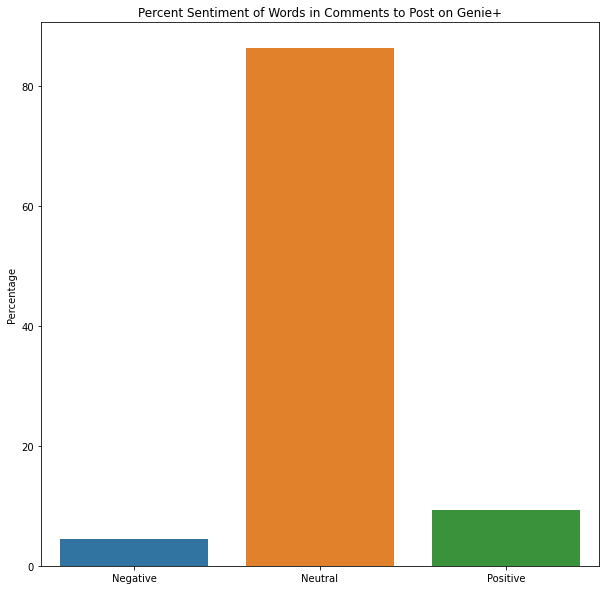

In [61]:
fig, ax = plt.subplots(figsize = (10,10))

counts = G_df.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.title('Percent Sentiment of Words in Comments to Post on Genie+')
plt.show()

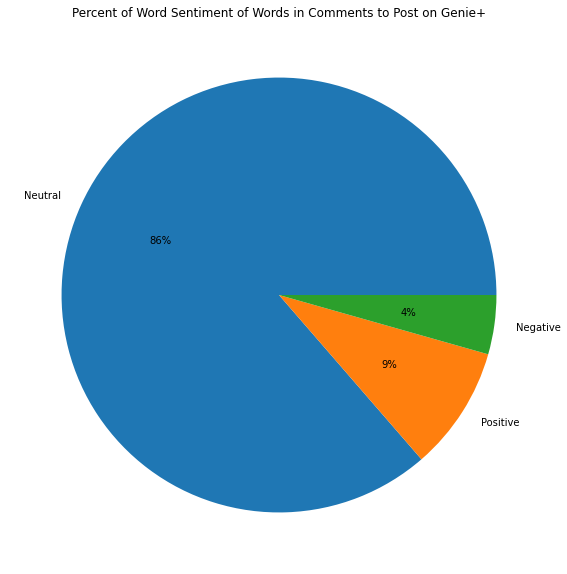

In [93]:
fig, ax = plt.subplots(figsize = (10,10))

counts = G_df.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Neutral', 'Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent of Word Sentiment of Words in Comments to Post on Genie+')
plt.show()

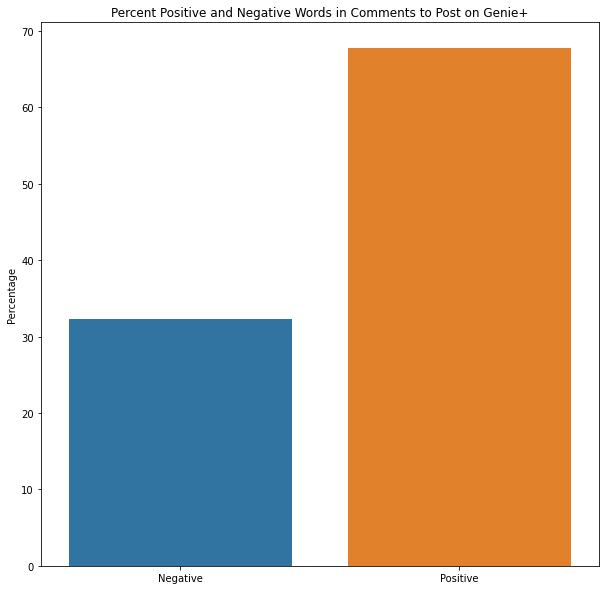

In [62]:
G_pos_neg = G_df.loc[G_df['label'] != 0]

fig, ax = plt.subplots(figsize = (10,10))

counts = G_pos_neg.label.value_counts(normalize=True) * 100

sns.barplot(x = counts.index, y = counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('Percentage')
plt.title('Percent Positive and Negative Words in Comments to Post on Genie+')
plt.show()

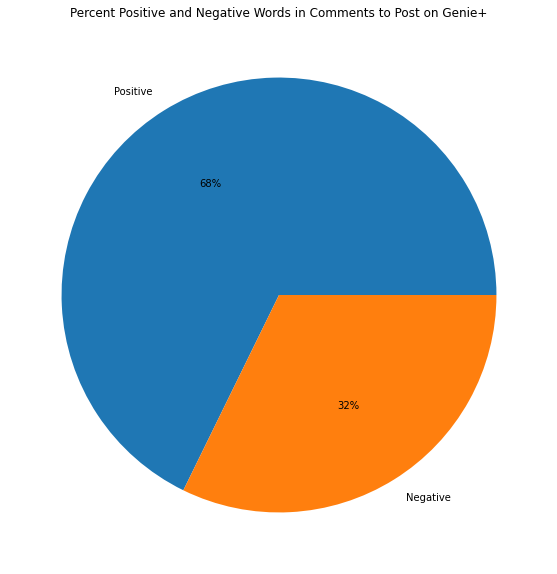

In [96]:
fig, ax = plt.subplots(figsize = (10,10))

counts = G_pos_neg.label.value_counts(normalize=True) * 100

plt.pie(counts, labels = ['Positive', 'Negative'], autopct='%.0f%%')

plt.title('Percent Positive and Negative Words in Comments to Post on Genie+')
plt.show()

In [64]:
G_positive = list(G_df.loc[G_df['label'] == 1].words)
print(G_positive)

['treat', 'please', 'like', 'thanks', 'safe', 'attraction', 'adventure', 'attraction', 'attraction', 'wish', 'interesting', 'play', 'like', 'well', 'like', 'win', 'win', 'like', 'huge', 'thankfully', 'attraction', 'wish', 'easier', 'like', 'recommends', 'popular', 'popular', 'interested', 'better', 'free', 'attraction', 'expand', 'attraction', 'attraction', 'pretty', 'happy', 'lol', 'sure', 'love', 'festival', 'xd', 'sure', 'free', 'best', 'definitely', 'play', 'kidding', 'wish', 'like', 'dynamic', 'great', 'luck', 'lol', 'like', 'like', 'true', 'surprise', 'surprise', 'lol', 'enjoying', 'attraction', 'kind', 'sure', 'better', 'like', 'fan', 'entertainment', 'party', 'chance', 'popular', 'hope', 'curious', 'great', 'like', 'like', 'hoping', 'help', 'precious', 'attractive', 'admit', 'holiday', 'honestly', 'like', 'worth', 'like', 'superior', 'free', 'good', 'awesome', 'opportunity', 'worth', 'cool', 'good', 'kind', 'hope', 'best', 'better', 'like', 'free', 'love', 'like', 'well', 'like

In [65]:
G_positive_frequency = FreqDist(G_positive)
G_positive_frequency

FreqDist({'like': 87, 'attraction': 44, 'free': 36, 'sure': 31, 'better': 23, 'lol': 22, 'good': 17, 'well': 16, 'yes': 15, 'yeah': 15, ...})

In [66]:
G_pos_df = pd.DataFrame(list(G_positive_frequency.items()), columns = ["Word","Frequency"])
print(G_pos_df.sort_values(by = ['Frequency'], ascending = False).head(10))
print('The total number of positive words is ', len(G_positive))

          Word  Frequency
2         like         87
5   attraction         44
19        free         36
24        sure         31
18      better         23
23         lol         22
53        good         17
10        well         16
70         yes         15
80        yeah         15
The total number of positive words is  771


In [67]:
G_neg = list(G_df.loc[G_df['label'] == -1].words)
G_neg_frequency = FreqDist(G_neg)
G_neg_frequency

FreqDist({'pay': 66, 'bad': 13, 'crazy': 9, 'hate': 9, 'drop': 9, 'limited': 7, 'doubt': 6, 'lower': 5, 'wrong': 5, 'avoid': 5, ...})

In [68]:
G_neg_df = pd.DataFrame(list(G_neg_frequency.items()), columns = ["Word","Frequency"])
print(G_neg_df.sort_values(by = ['Frequency'], ascending = False).head(10))
print('The total number of negative words is ', len(G_neg))

       Word  Frequency
15      pay         66
19      bad         13
27     drop          9
14     hate          9
13    crazy          9
93  limited          7
33    doubt          6
90  problem          5
30    avoid          5
76      low          5
The total number of negative words is  367


In [69]:
G_pos_words = [str(p) for p in G_positive_frequency]
G_pos_words_string = ','.join(G_pos_words)
G_neg_words = [str(n) for n in G_neg_frequency]
G_neg_words_string = ','.join(G_neg_words)

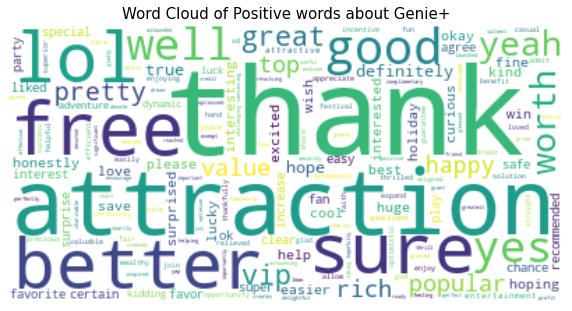

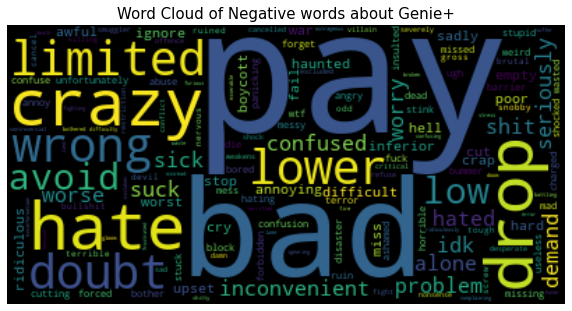

In [94]:
from wordcloud import WordCloud
G_wordcloud_pos = WordCloud(background_color='white').generate(G_pos_words_string)
G_wordcloud_neg = WordCloud().generate(G_neg_words_string)
plt.rcParams['figure.figsize'] = (10,10) 
plt.imshow(G_wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud of Positive words about Genie+', fontsize = 15 )
plt.axis('off')
plt.show()

plt.imshow(G_wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative words about Genie+', fontsize = 15 )
plt.axis('off')
plt.show()

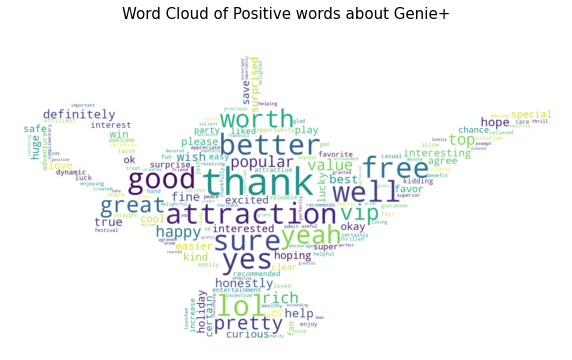

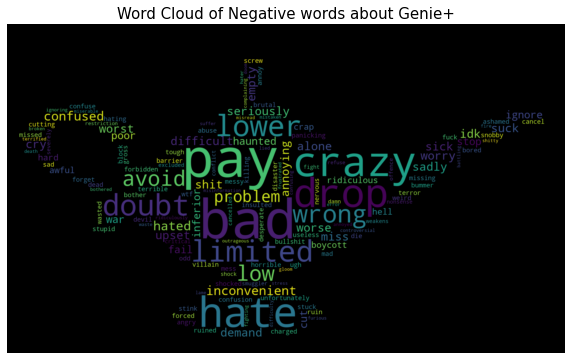

In [74]:
from wordcloud import WordCloud
mask = np.array(Image.open("genie-lamp-silhouette-3.jpg"))
G_wordcloud_pos = WordCloud(background_color='white', mask=mask).generate(G_pos_words_string)
G_wordcloud_neg = WordCloud(mask=mask).generate(G_neg_words_string)
plt.rcParams['figure.figsize'] = (10,10) 
plt.imshow(G_wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive words about Genie+', fontsize = 15 )
plt.show()

plt.imshow(G_wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud of Negative words about Genie+', fontsize = 15 )
plt.axis('off')
plt.show()